# 3. Consuming data using Kafka
In this task, we will implement an Apache Kafka consumer to consume the data from task 2.8b.

Important: 
- In this task, use Kafka consumer to consume the streaming data published from task 2.8b.
- Do not use Spark in this task

Draw a line chart using the data you received. Use timestamp(the key of the data you received) as the x axis, and the avg weekly salsed of each type store as y axis. The plot should be update after each time you received new batch of data.

<IPython.core.display.Javascript object>


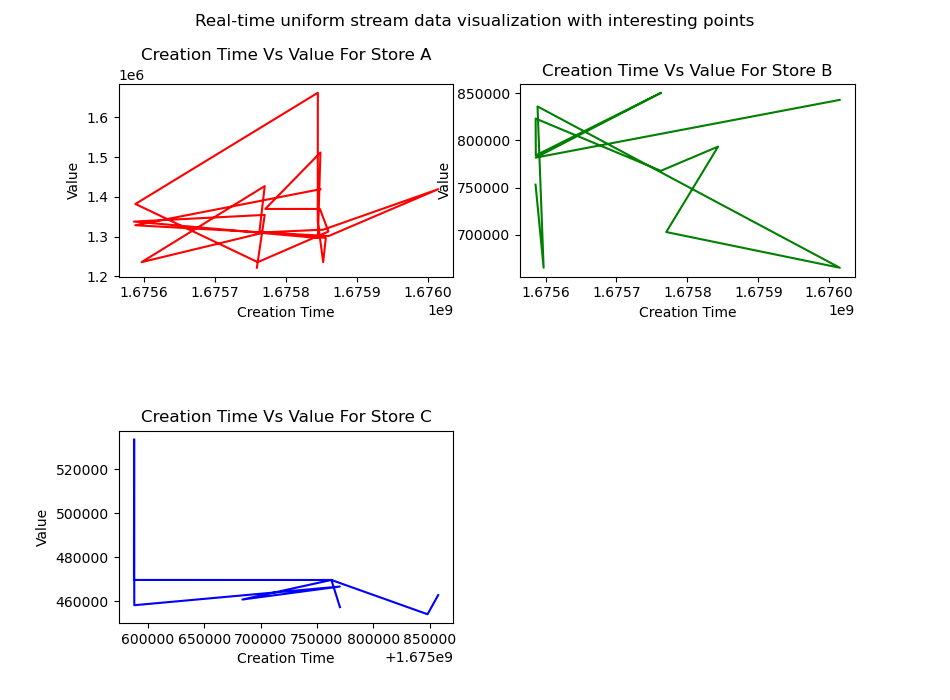

KeyboardInterrupt: 

In [3]:
# import statements
from time import sleep
from kafka3 import KafkaConsumer
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
from json import loads
from pyspark.sql import functions as F

# this line is for the inline display of graphs in Jupyter Notebook
%matplotlib notebook

# setting topic name as the same one used in spark-- kafka sink
topic = 'topic1'
# setting host id
hostip = "192.168.1.101"

# defining a kafka consumer function for connecting with topic in the brooker with appropriate options
def connect_kafka_consumer():
    _consumer = None
    try:
        _consumer = KafkaConsumer(topic,
                                  consumer_timeout_ms=30000, # stop iteration if no message after 10 sec
                                  auto_offset_reset='latest', # comment this if you don't want to consume earliest available message
                                  bootstrap_servers=[f'{hostip}:9092'],
                                  value_deserializer=lambda x: loads(x.decode('ascii')),
                                  api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka') # setting exception 
        print(str(ex))
    finally:
        return _consumer

# defining a function to set a canvas for the figure with labels, title
def init_plots():
    try:
        width = 9.5
        height = 7
        fig = plt.figure(figsize=(width,height)) # create new figure
        fig.subplots_adjust(hspace=0.8)
       # adding the subplot
        ax1 = fig.add_subplot(221)
        ax2 = fig.add_subplot(222)
        ax3 = fig.add_subplot(223)
       
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Value')
        ax1.title.set_text('Sales for Store Type A')
        
        ax2.set_xlabel('Time')
        ax2.set_ylabel('Value')
        ax2.title.set_text('Sales for Store Type B')
        
        ax3.set_xlabel('Time')
        ax3.set_ylabel('Value')
        ax3.title.set_text('Sales for Store Type C')

        
        fig.suptitle('Real-time uniform stream data visualization with interesting points') # giving figure a title
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        
        return fig, ax1, ax2, ax3
    
    except Exception as ex:
        print(str(ex))
    
# defining ultimate function that confirms kafka connect, grabs data from the stream and show plots
def consume_messages(consumer, fig, ax1, ax2, ax3):
    try:
        # container for x and y values
        x1, x2, x3, y1, y2, y3 = [], [], [], [], [], []
    
        
        for message in consumer:
            data = message.value
            
            if data['Type'] == 'A':
                y1.append(float(data['predict_weekly_sales']))
                x1.append(data['key'])
            elif data['Type'] == 'B':
                y2.append(float(data['predict_weekly_sales']))
                x2.append(data['key'])
            else:
                y3.append(float(data['predict_weekly_sales']))
                x3.append(data['key'])
            
    
            # Starting plotting only when we have 45 average sales data for all stores as each bach is of 45 records.
            if len(y1+y2+y3) >= 45:
                ax1.clear()
                ax1.plot(x1, y1, color='r')
                ax1.set_xlabel('Creation Time')
                ax1.set_ylabel('Value')
                ax1.set_title('Creation Time Vs Value For Store A')
                
                ax2.clear()
                ax2.plot(x2, y2, color='g')
                ax2.set_xlabel('Creation Time')
                ax2.set_ylabel('Value')
                ax2.set_title('Creation Time Vs Value For Store B')
                
                ax3.clear()
                ax3.plot(x3, y3, color='b')
                ax3.set_xlabel('Creation Time')
                ax3.set_ylabel('Value')
                ax3.set_title('Creation Time Vs Value For Store C')
                
            
                fig.canvas.draw()
                x1.pop(0)
                x2.pop(0)
                x3.pop(0)# removing the item in the first position
                y1.pop(0)
                y2.pop(0)
                y3.pop(0)
        plt.close('all')
        
    except Exception as ex:
        print(str(ex))
    
if __name__ == '__main__':
    consumer = connect_kafka_consumer()
    fig, ax1, ax2, ax3 = init_plots()
    consume_messages(consumer, fig, ax1, ax2, ax3)
    